In [6]:
from datascience import *
from urllib.request import urlopen
import numpy as np
%matplotlib inline
import pandas 
import matplotlib 
import matplotlib.pyplot as plots 
import matplotlib.pyplot as plt

party_table_all_years = pandas.read_csv("countypres_2000-2020.csv")
party_table_all_years["county"] = party_table_all_years["county_name"] + ", " + party_table_all_years["state_po"]
party_table_2016 = party_table_all_years[party_table_all_years["year"].eq(2016)]
party_table_final = party_table_2016[["candidatevotes","county","party"]]
max_rows = party_table_final.groupby(["county"])["candidatevotes"].transform(max) == party_table_final["candidatevotes"]
party_table = party_table_final[max_rows]
party_table1 = Table.from_df(party_table)
party_table1.sort("county", descending = False)

candidatevotes,county,party
6763,"ABBEVILLE, SC",REPUBLICAN
21162,"ACADIA, LA",REPUBLICAN
8583,"ACCOMACK, VA",REPUBLICAN
93752,"ADA, ID",REPUBLICAN
2461,"ADAIR, IA",REPUBLICAN
6637,"ADAIR, KY",REPUBLICAN
6030,"ADAIR, MO",REPUBLICAN
4787,"ADAIR, OK",REPUBLICAN
96558,"ADAMS, CO",DEMOCRAT
1395,"ADAMS, IA",REPUBLICAN


In [33]:
emission = Table.read_table("cdcbyyear.csv")
emission_columns = emission.select("State","County","2016 Total reported direct emissions")


"""def remove_county(pay_string):
    return (pay_string.strip("COUNTY"))
function_emission = emission_columns.apply(remove_county,"COUNTY")
function_emission
new_table = emission_columns.with_column("minus county", function_emission)
new_table"""

emission_pandas = Table.to_df(emission_columns)
emission_pandas["County"] = emission_pandas["County"].str.upper()
emission_pandas["County"] = emission_pandas["County"].str.replace("COUNTY","")
emission_pandas["County"] = emission_pandas["County"].str.replace(" PARISH","")
emission_pandas["2016 Total reported direct emissions"] = emission_pandas["2016 Total reported direct emissions"].str.replace(",","")
emission_pandas["2016 Total reported direct emissions"] = emission_pandas["2016 Total reported direct emissions"].str.replace("nan","0")
emission_pandas["County"] = emission_pandas["County"] + ", " + emission_pandas["State"]
emission_pandas
emission_numpy = Table.from_df(emission_pandas)
emission_table_final = emission_numpy.drop("State")
total_emissions = make_array()
def convert(string):
    float2 = float(string)
    return float2
for i in np.arange(0,len(emission_table_final.column("2016 Total reported direct emissions"))):
    total_emissions = np.append(total_emissions, convert(emission_table_final.column("2016 Total reported direct emissions").item(i)))
final_emissions_table = emission_table_final.with_column(
    "Total Emissions",total_emissions
). drop("2016 Total reported direct emissions")
final_emissions_table.sort("County", descending = False)
final_emissions_table = final_emissions_table.group("County", np.sum)
final_emissions_table

County,Total Emissions sum
"ACADIA, LA",2.98831e+06
"ACCOMACK , VA",89747
"ACCOMACK, VA",79438.7
"ADA , ID",195663
"ADAMS , CO",1.06556e+06
"ADAMS , IA",109445
"ADAMS , IL",131130
"ADAMS , IN",74825.5
"ADAMS , MS",84152.2
"ADAMS , NE",359999


In [37]:
emissions_party_table = final_emissions_table.join("County",party_table1,"county")
final_2016 = emissions_party_table.with_column("Year", np.repeat(2016, emissions_party_table.num_rows))
final_2016

County,Total Emissions sum,candidatevotes,party,Year
"ACADIA, LA",2.98831e+06,21162,REPUBLICAN,2016
"ACCOMACK, VA",79438.7,8583,REPUBLICAN,2016
"ADAMS, CO",3.38113e+06,96558,DEMOCRAT,2016
"ADAMS, MS",0,7757,DEMOCRAT,2016
"ADAMS, NE",1.33529e+06,9287,REPUBLICAN,2016
"ADAMS, OH",1.4238e+07,8659,REPUBLICAN,2016
"ADAMS, PA",1.77382e+06,31423,REPUBLICAN,2016
"AIKEN, SC",938820,46025,REPUBLICAN,2016
"ALACHUA, FL",1.30259e+06,75820,DEMOCRAT,2016
"ALAMEDA, CA",435135,514842,DEMOCRAT,2016


In [38]:
final_2016.to_df().to_csv('final_2016.csv', index = False)

Text(0.5, 1.0, 'Average Total Emissions Per County, Stratified by Political Party')

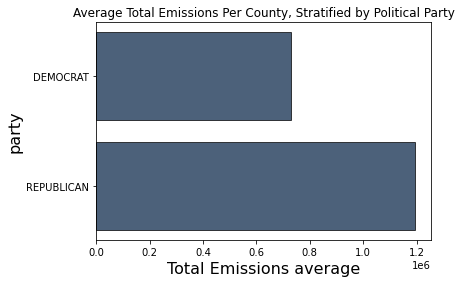

In [40]:
emission_plot = emissions_party_table.select("party","Total Emissions").group("party",np.average)
emission_plot.barh("party","Total Emissions average")
plots.title("Average Total Emissions Per County, Stratified by Political Party")  

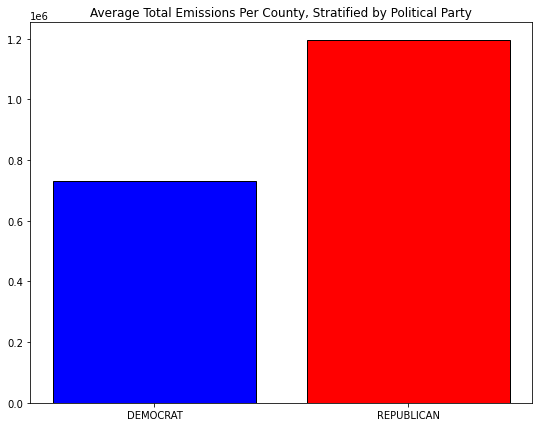

In [41]:
plt.figure(figsize=(9,7))

party = emission_plot.column("party")
emissions = emission_plot.column("Total Emissions average")

plt.bar(party, emissions, color=["blue", "red"])
plots.title("Average Total Emissions Per County, Stratified by Political Party")

plt.show()